In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 1: Load the data.
data = pd.read_csv('/content/loan_approval_dataset.csv')

In [4]:
# Update column names and values to remove extra spaces
data.columns = data.columns.str.strip()
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()
data['loan_status'] = data['loan_status'].str.strip()

# Convert categorical data using One-Hot Encoding
data = pd.get_dummies(data, columns=['education', 'self_employed'], drop_first=False)

# Convert target variable to numeric
data['loan_status'] = data['loan_status'].replace({'Approved': 1, 'Rejected': 0})

# Create features and target dataset
X = data.drop('loan_status', axis=1)
y = data['loan_status']

<ipython-input-4-37b0a20a217d>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace({'Approved': 1, 'Rejected': 0})


In [5]:
# Step 3: Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Build and Train the Models

# Random Forest Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Save the Random Forest model
joblib.dump(model_rf, 'random_forest_model.pkl')

# XGBoost Model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=1.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Save the XGBoost model
joblib.dump(model_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [7]:
# Step 5: Make Predictions and Evaluate

# Random Forest
predictions_rf = model_rf.predict(X_val)
accuracy_score_rf = accuracy_score(predictions_rf, y_val)
confusion_matrix_rf = confusion_matrix(predictions_rf, y_val)
classification_report_rf = classification_report(predictions_rf, y_val)

print("Random Forest: ")
print(f"Accuracy Score: {accuracy_score_rf}")
print(f"Confusion Matrix: \n{confusion_matrix_rf}")
print(f"Classification Report: \n{classification_report_rf}")

# XGBoost
predictions_xgb = model_xgb.predict(X_val)
accuracy_score_xgb = accuracy_score(predictions_xgb, y_val)
confusion_matrix_xgb = confusion_matrix(predictions_xgb, y_val)
classification_report_xgb = classification_report(predictions_xgb, y_val)

print("XGBoost: ")
print(f"Accuracy Score: {accuracy_score_xgb}")
print(f"Confusion Matrix: \n{confusion_matrix_xgb}")
print(f"Classification Report: \n{classification_report_xgb}")

Random Forest: 
Accuracy Score: 0.9789227166276346
Confusion Matrix: 
[[309   9]
 [  9 527]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

XGBoost: 
Accuracy Score: 0.9789227166276346
Confusion Matrix: 
[[310  10]
 [  8 526]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.98      0.99      0.98       534

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



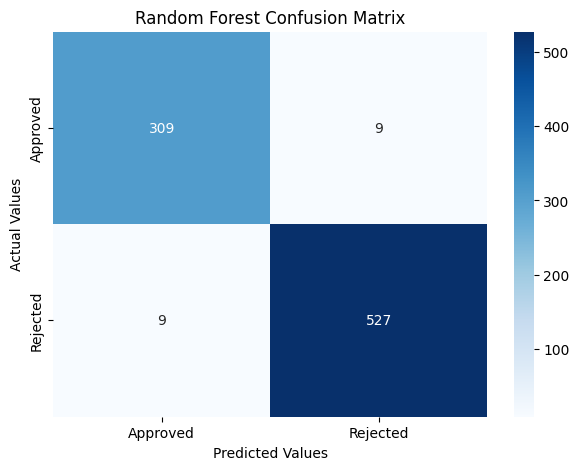

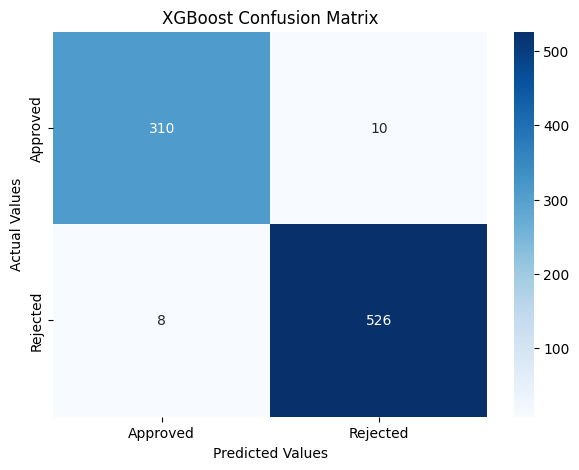

In [8]:
# Step 6: Visualization
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Confusion Matrix')

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XGBoost Confusion Matrix')

plt.show()